# Description:

**In the dataset provided, the city of seattle only receives 911 calls for four reasons- a hot latte spills all over your lap (ouch!), Beavers attack unsuspecting passersbys (watch out for those beavers!), Seal attacks (can't be too careful), and Marshawn Lynch sightings (people get very excited and choose to call 911 for some reason).**

**Task: To perform analysis on this dataset and extract insights.**

In [7]:
#importing packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#importing the dataset
seattle_data_911 = pd.read_excel("rev data for test.xlsx")

#see the sample of dataframe to know how it looks like
#dataset has 1514 observationd of 4 variables: Type - which indicates type of call, Longitude - longitude of the location, Latitude - latitude of the location, Report.Location - location reported.

seattle_data_911.head(5)


,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [9]:
seattle_data_911['Type'].value_counts()

Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Type, dtype: int64

## Question 1.A: What is the most common reason for calling 911?
## Answer: Beaver Accident is the most common reason for calling 911 in seattle(from the above observations).

## Question 1.B: Display these results graphically

Text(0.5, 1.0, 'Reason for Calling 911')

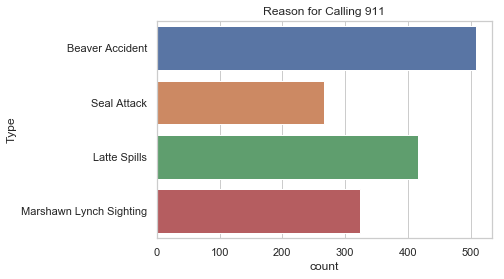

In [10]:
sns.set(style="whitegrid")
ax = sns.countplot(y="Type", data = seattle_data_911)
plt.title("Reason for Calling 911")

Text(0.5, 1.0, 'Reason for Calling 911')

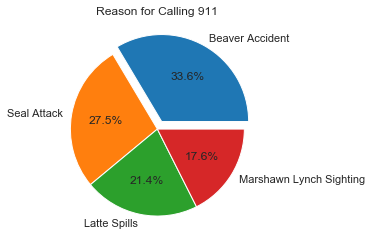

In [11]:
#plotting pie chart to get the percentages of each attack
percent= seattle_data_911['Type'].value_counts()
reason = seattle_data_911['Type'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
explode = (0.1,0,0,0)
plt.pie(percent, explode=explode,labels=reason,colors=colors,autopct='%1.1f%%',shadow=False)
plt.title("Reason for Calling 911")

## Question 2.A: Please create a graph of the 911 calls using the 'Latitude' and 'Longitude' (graph type is up to you)
(differentiate call type using colors)

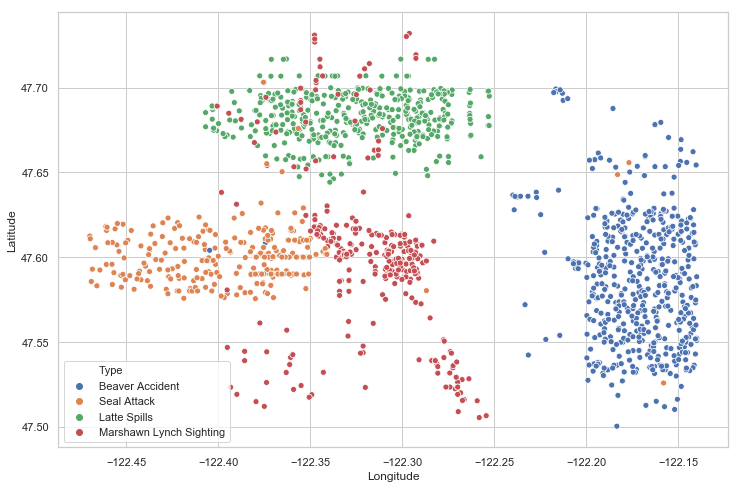

In [12]:
#plotting the data shows the patterns in the data
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y='Latitude', x='Longitude',data= seattle_data_911, hue = 'Type')
plt.legend(loc='lower left')


 **In the above graph each point represents a 911 incident reported and the cause can be identified by the color of the dot. This plot indicates why 911 calls are being made are different from different areas of the city. This implies different areas in seattle have diffrent problems**

In [ ]:
## Another effective way to view these points is to plot them on google maps using Latitude and Longitude column values.

In [14]:
#getting api_key without revealing it in jupyter notebook considering security.
with open('api_key.txt') as f:
    api_key = f.readline()
    f.close

In [15]:
#importing google maps libaraies
import gmaps
import gmaps.datasets
gmaps.configure(api_key=api_key)

In [29]:
Beaver_df = seattle_data_911[seattle_data_911.Type == 'Beaver Accident']
Beaver_df = Beaver_df[['Latitude','Longitude']]
Latte_df = seattle_data_911[seattle_data_911.Type == 'Latte Spills']
Latte_df = Latte_df[['Latitude','Longitude']]
mls_df = seattle_data_911[seattle_data_911.Type == 'Marshawn Lynch Sighting']
mls_df = mls_df[['Latitude','Longitude']]
Seal_df = seattle_data_911[seattle_data_911.Type == 'Seal Attack']
Seal_df = Seal_df[['Latitude','Longitude']]

In [91]:
Beaver_layer = gmaps.symbol_layer(Beaver_df, fill_color='green',stroke_color='green', scale=2)
Latte_layer = gmaps.symbol_layer(Latte_df, fill_color='red',stroke_color='red', scale=2)
mls_layer = gmaps.symbol_layer(mls_df, fill_color='blue', stroke_color='blue', scale=2)
Seal_layer = gmaps.symbol_layer(Seal_df, fill_color='black', stroke_color='black', scale=2)
fig = gmaps.figure()
fig.add_layer(Beaver_layer)
fig.add_layer(Latte_layer)
fig.add_layer(mls_layer)
fig.add_layer(Seal_layer)
fig


Figure(layout=FigureLayout(height='420px'))

**Normal Map**
%%html
<img src ="map_1.png">

**Zoomed Map**
<img src ="Zoomed_map.png">

**Satellite Version: A hybrid map can give us the aesthetics of satellite map and deatils from a regular roadmap. This helps us view the data points (or, location of call) with greater clarity- especially the points on water bodies. This can be seen from the map below:**

<img src ="Satellite.png">



**Tried Both Map and Satellite from the above graph**

**From this map, we can identify the regions where each type of 911 call is typically made. We see that different areas of the city call 911 mostly for problems specific to their region.**

**Beaver accidents** related calls are mostly from Bellevue region of the city bound between Bridle Trials and New Castle with West Bellevue area to have most reported calls of Beaver Accident. This may be attributed due to the presence of Botanical garden and Kelsey Creek Park in the region.

**Seal Attacks** mostly bound around the Elliot Bay area of the city. This is so because sea / ocean body are habitat for seals and they have a higher chance of human interaction because of ferry routes 304 and 305 passing through the bay!

**Latte Spills** occuring more on the north of Seattle distributed between Fremont and Greenwood.

**Marshawn Lynch Sightings** occuring mostly in the central and southern regions of Seattle city.


## Question 2.B: Are there any data points that look mislabeled?

Answer: From the observatio from the scatter plot and google map, there are chances that some of the data points would have been mislabeled. 
There is no reason to say Latte Spills to me mislabeled. 
There are few sightings of Marshawn Lynch Sightings on north of seattle, but these may not be mislabeled point.
The data points for Seal Attacks are mostly observed in Elliott Bay area but some points can be seen in Belleuve area which could probably be a mislabled point. 
Some Beaver Accidents have been located from the sea (Elliott Bay area), which seems unlikely and could be a mislabeled point.

## Question 3.A: If we were to use only 'Latitude' and 'Longitude', could we make an intelligent decision as to why a resident dialed 911? (In other words, if we take off the labels - can we still determine which category a 911 call would most likely fall into?) Please describe this algorithm and your reason for choosing it.

**Goal is to find the reason behind call based on just latitude and longitude, trying an unsupervised algorithm k-means.
K-means clustering is the simplest and the most commonly used clustering method for splitting a dataset into a set of k groups. I would like choose k=4 as we have 4 reasons for call. But to ensure we have choosen right value for k with minimal within cluster, i am performing elbow method for optimal k.**

In [70]:
ll_df= seattle_data_911[['Latitude','Longitude']]
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ll_df)
    Sum_of_squared_distances.append(km.inertia_)

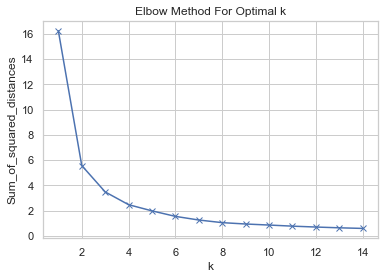

In [71]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the above elbow graph we can see that change in ratio after k=4 is very less. k=4 is optimal number of classification here. This gives us an idea of how the accident calls have great impact to make a prediction about the type of accident from the co-ordinates**

**I would like to use K Nearest Neighbors Classifier. Based on the above plot, we have got a general idea that the different calls have a broad pattern based on the location. This helped me comprehend distance feature could be of importance. knn model is known to not generalizing data and works great on smaller datasets, considering all this knn would be good model for a problem like this.**

## Question 3.C: Please display the results of your algorithm, along with the associated code

**Preprocessing and dividing data in to Train and Test Splits**

In [72]:

X = ll_df
y = seattle_data_911['Type']

# To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. 
#This way our algorithm is tested on un-seen data, as it would be in a production application.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
#the above line splits dataset in to 75% Train Data and 25% Test Data

**Feature Scaling- the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.**



In [73]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

**Training and Predictions**

In [74]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
y_pred = classifier.predict(X_test)  

**Evaluating the algorithm**

In [76]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[127   0   0   1]
 [  0 106   0   0]
 [  0   7  69   0]
 [  1   1   2  65]]
                         precision    recall  f1-score   support

        Beaver Accident       0.99      0.99      0.99       128
           Latte Spills       0.93      1.00      0.96       106
Marshawn Lynch Sighting       0.97      0.91      0.94        76
            Seal Attack       0.98      0.94      0.96        69

              micro avg       0.97      0.97      0.97       379
              macro avg       0.97      0.96      0.96       379
           weighted avg       0.97      0.97      0.97       379



**Accuracy of the model: 97%**

## Question 3.B: Does the algorithm chosen utilize Euclidean distance? Should we be concerned that 'Latitude' and 'Longitude' are not necessarily Euclidean?

**Answer: knn model used the Euclidean distance. And it is true that latitude and longitude are not necessarily euclidean. When dealing with latitude and longitude it is advised to use other distance metrics such as Haversine Distance - which is also called "as the crow files" distance or great circle distance metric for better results.**

## Question 3.D: Please display the number of correct categorizations

In [80]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[127   0   0   1]
 [  0 106   0   0]
 [  0   7  69   0]
 [  1   1   2  65]]
                         precision    recall  f1-score   support

        Beaver Accident       0.99      0.99      0.99       128
           Latte Spills       0.93      1.00      0.96       106
Marshawn Lynch Sighting       0.97      0.91      0.94        76
            Seal Attack       0.98      0.94      0.96        69

              micro avg       0.97      0.97      0.97       379
              macro avg       0.97      0.96      0.96       379
           weighted avg       0.97      0.97      0.97       379



**From the above confusion matrix we can say**

**1 Beaver Accident is misclassified as Seal Attack.** 

**7 Marshawn Lynch Sighting are misclassified as Latte Spills.** 

**In Seal Attacks 4 of them are misclassified where 1 is Beaver Accident, 1 is Latte Spills and 2 are Marshawn Lynch Sighting.**

## Question 3.E: What insight can we extract from this analysis?

**Answer: The pattern of calls is observed based on the location and gives us confidence it is atmost dependent on the location. knn model has performed really well in predicting labels with just Latitude and Longitude. As the co-ordinates are of data points only within seattle, 97% accuracy is good outcome.** 